# Критерии Стьюдента

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

C:\Users\merce\Anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\merce\Anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [5]:
data = pd.read_csv("ADHD.txt", sep=' ', header=0)
data.columns = ['Placebo', 'Methylphenidate']
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


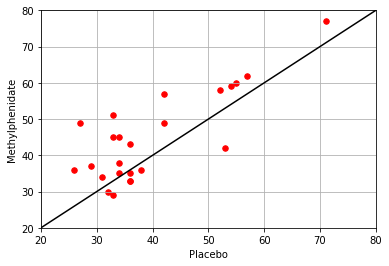

In [6]:
data.plot.scatter('Placebo', 'Methylphenidate', c='r', s=30)
pylab.grid()
pylab.plot(range(100), c='black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

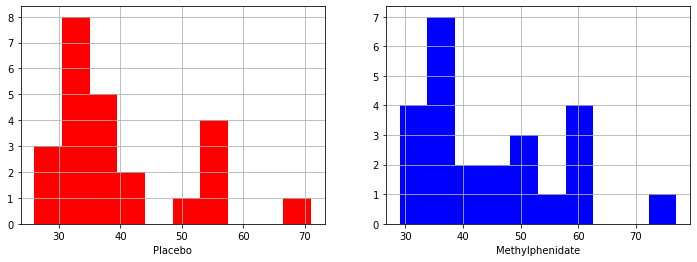

In [7]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data.Placebo, color='r')
pylab.xlabel('Placebo')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data.Methylphenidate, color='b')
pylab.xlabel('Methylphenidate')

pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [8]:
scipy.stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [11]:
print("conf interval: [%f, %f]" % zconfint(data.Placebo))

conf interval: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

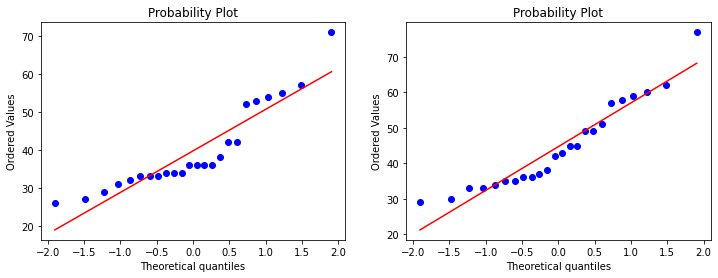

In [12]:
pylab.figure(figsize=(12,4))
pylab.subplot(1,2,1)
stats.probplot(data.Placebo, dist='norm', plot=pylab) ## Q-Q plot
pylab.subplot(1,2,2)
stats.probplot(data.Methylphenidate, dist='norm', plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [13]:
print("shapiro normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

shapiro normality test, W-statistic: 0.857487, p-value: 0.003020


In [14]:
print("shapiro normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

shapiro normality test, W-statistic: 0.916445, p-value: 0.048768


нулевая гипотеза отвергается, однако по рисунку распределение отличается от нормального, но не сильно, 
и критерий стьюдента работает в улсовиях когда распределение не является нормальным, но существенно от него не отличается

С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [15]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var=False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [16]:
# интервально оценим разности средних этих выборок
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("conf interval: [%f, %f]" % cm.tconfint_diff(alpha=0.05))

conf interval: [-1.914589, 11.831256]


## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

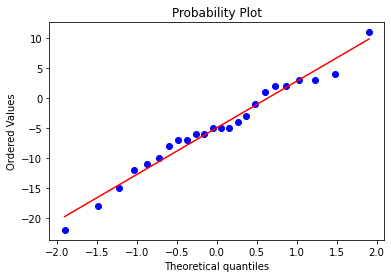

In [17]:
stats.probplot(data.Placebo - data.Methylphenidate, dist='norm', plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [18]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [19]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [ ]:
print(" 95%% conf interval")